In [1]:
import sys
import os
import torch
from matplotlib import pyplot as plt
from time import time
import numpy as np
os.chdir("..")
os.chdir("..")
from src.cpwc.tools.ptychography import Ptychography
from src.cpwc.tools.u_electron_microscopy import initialize_physical_params, get_proj, get_ring_average
from src.cpwc.tools.u_ptychography import get_overlap_img,get_overlap_area

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize object
max_scale = 7
max_probe_size = 32
max_shift = 8
device = 'cuda'

In [4]:
linop1 = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
linop2 = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
linop4 = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
linop8 = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
image = plt.imread('samples/peppers.jpg')[:2**max_scale, :2**max_scale] / 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)

In [5]:
image_tensor_2 = image_tensor_[:,:,::2,::2]
image_tensor_4 = image_tensor_[:,:,::4,::4]
image_tensor_8 = image_tensor_[:,:,::8,::8]

m1 = linop1.apply(image_tensor_)
probe1 = linop1.probe.cpu()

m2 = linop2.apply(image_tensor_2)
probe2 = linop2.probe.cpu()

m4 = linop4.apply(image_tensor_4)
probe4 = linop4.probe.cpu()

m8 = linop8.apply(image_tensor_8)
probe8 = linop8.probe.cpu()





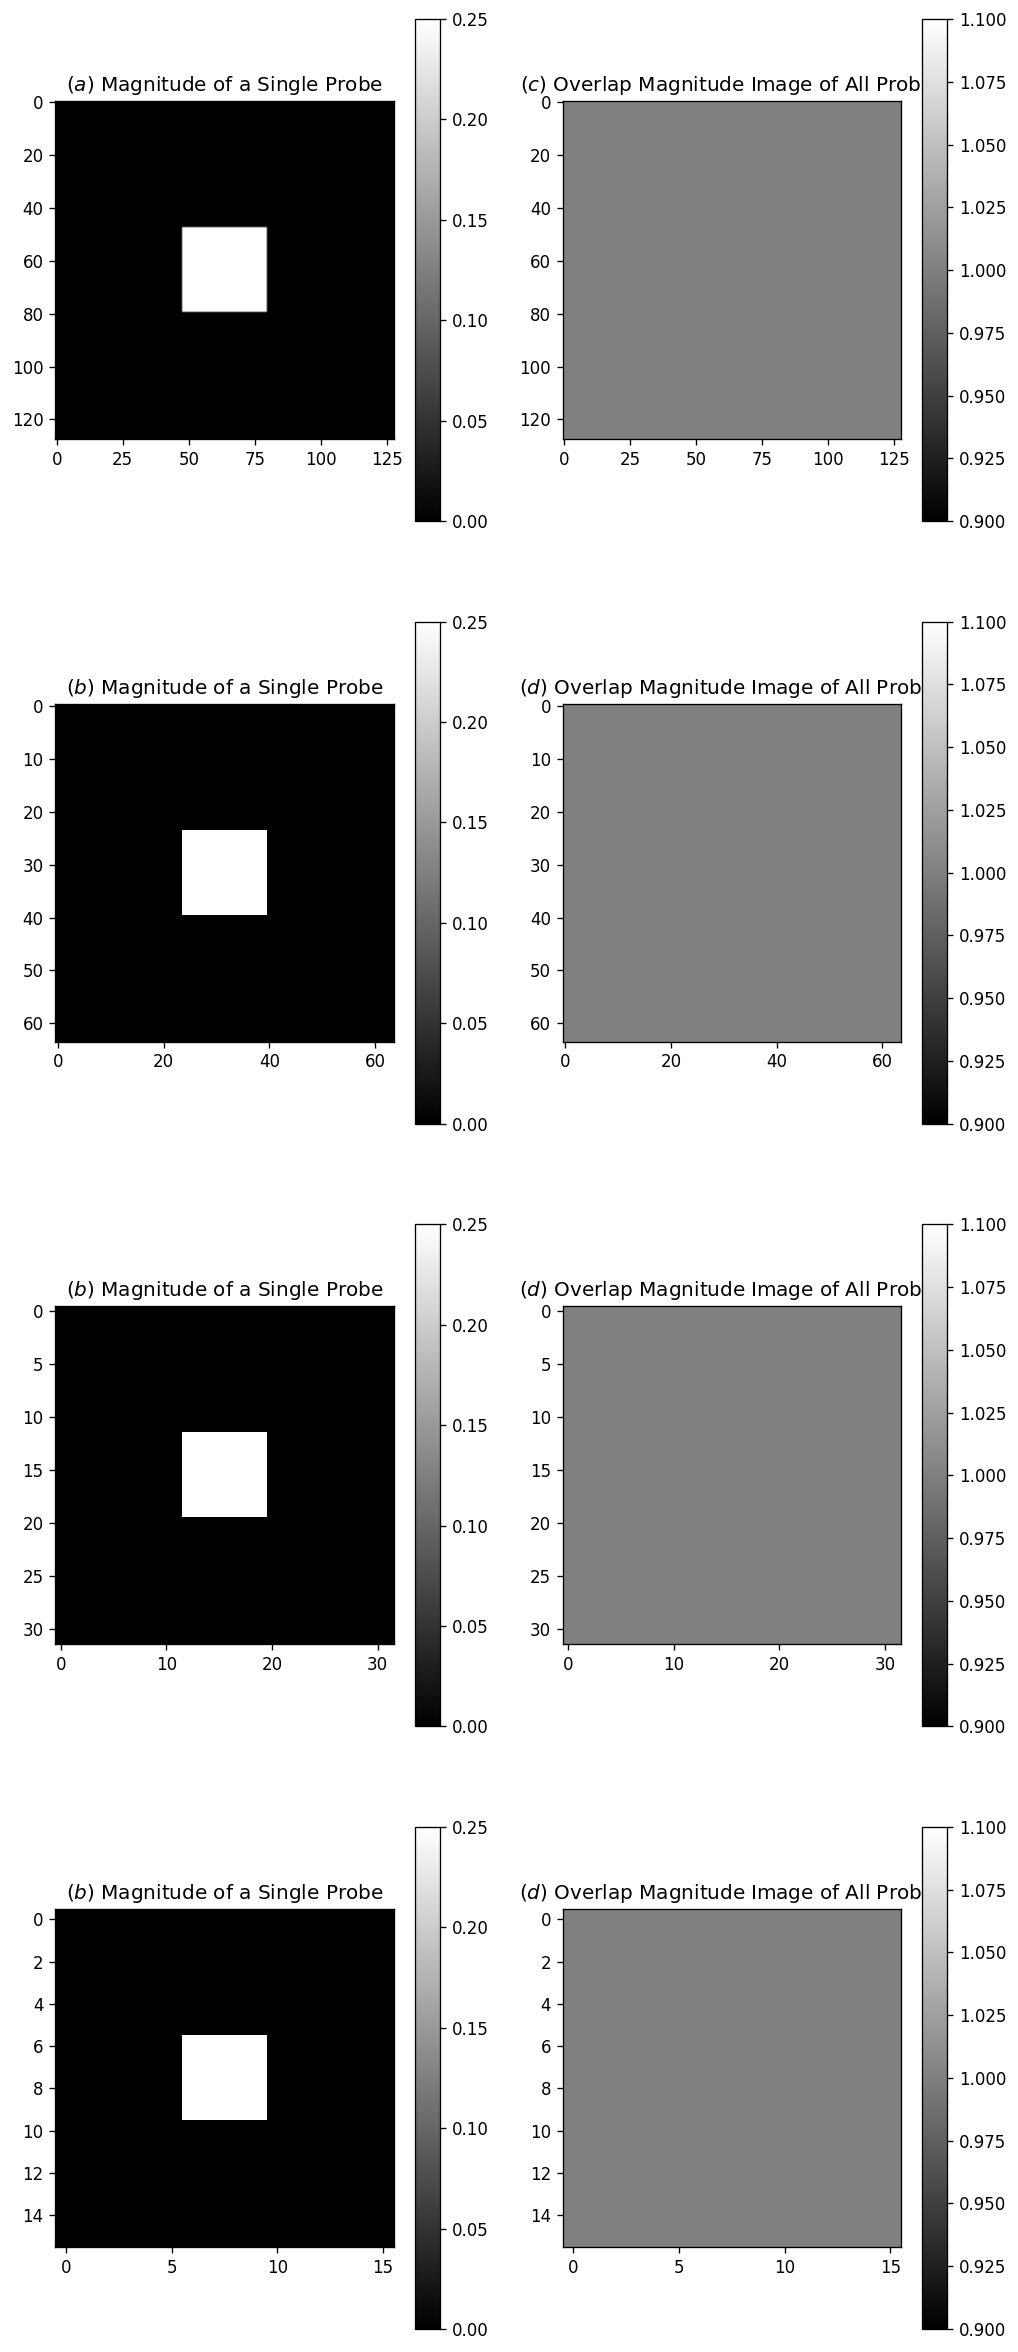

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(10,25),dpi = 120)

plt.subplot(4, 2, 1)
plt.imshow(torch.abs(probe1),cmap='gray')
plt.title(r"$(a)$ Magnitude of a Single Probe")
plt.colorbar()

# Plot overlap img
overlap_img = get_overlap_img(linop1.probe, linop1.shifts, n_dim=2)
plt.subplot(4, 2, 2)
plt.imshow(overlap_img.cpu(), cmap='gray')
plt.title(r"$(c)$ Overlap Magnitude Image of All Probes")
plt.colorbar()

plt.subplot(4, 2, 3)
plt.imshow(torch.abs(probe2),cmap='gray')
plt.title(r"$(b)$ Magnitude of a Single Probe")
plt.colorbar()

# Plot overlap img
overlap_img = get_overlap_img(linop2.probe, linop2.shifts, n_dim=2)
plt.subplot(4, 2, 4)
plt.imshow(overlap_img.cpu(), cmap='gray')
plt.title(r"$(d)$ Overlap Magnitude Image of All Probes")
plt.colorbar()

plt.subplot(4, 2, 5)
plt.imshow(torch.abs(probe4),cmap='gray')
plt.title(r"$(b)$ Magnitude of a Single Probe")
plt.colorbar()

# Plot overlap img
overlap_img = get_overlap_img(linop4.probe, linop4.shifts, n_dim=2)
plt.subplot(4, 2, 6)
plt.imshow(overlap_img.cpu(), cmap='gray')
plt.title(r"$(d)$ Overlap Magnitude Image of All Probes")
plt.colorbar()

plt.subplot(4, 2, 7)
plt.imshow(torch.abs(probe8),cmap='gray')
plt.title(r"$(b)$ Magnitude of a Single Probe")
plt.colorbar()

# Plot overlap img
overlap_img = get_overlap_img(linop8.probe, linop8.shifts, n_dim=2)
plt.subplot(4, 2, 8)
plt.imshow(overlap_img.cpu(), cmap='gray')
plt.title(r"$(d)$ Overlap Magnitude Image of All Probes")
plt.colorbar()

plt.show()
plt.tight_layout()



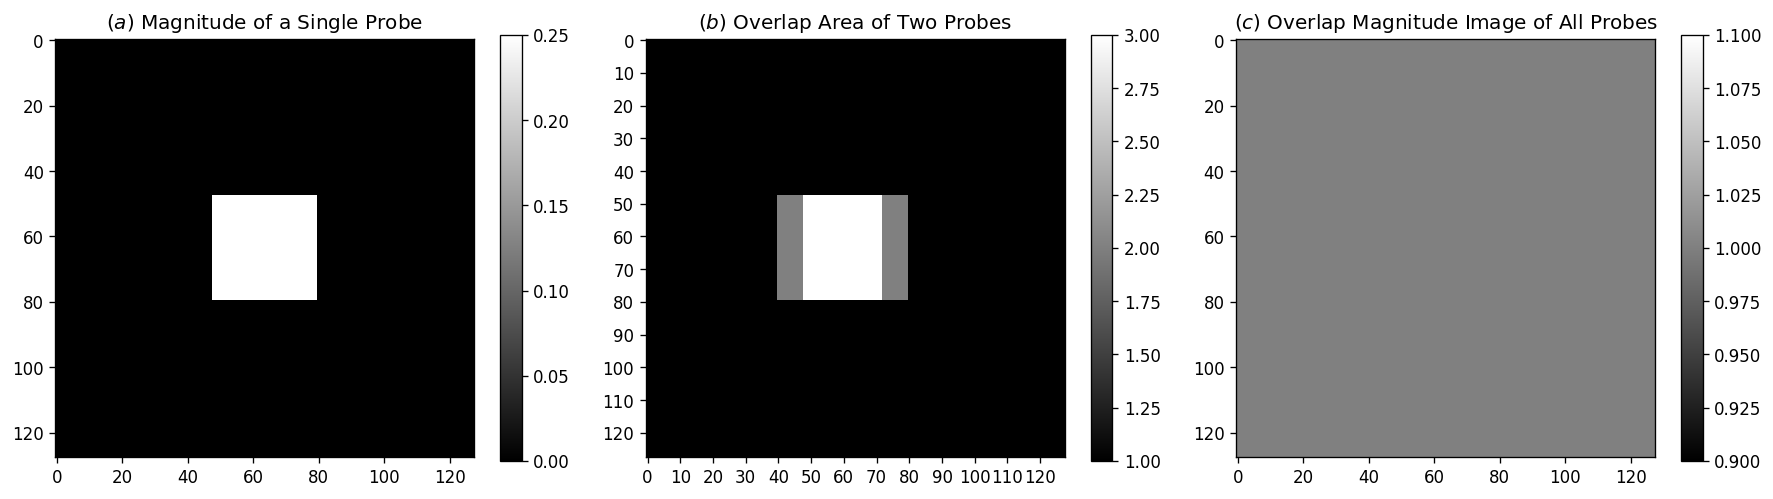

In [9]:
plt.figure(figsize=(15,4),dpi = 120)

plt.subplot(1, 3, 1)
plt.imshow(torch.abs(probe1),cmap='gray')
plt.title(r"$(a)$ Magnitude of a Single Probe")
plt.colorbar()

overlap_area = get_overlap_area(probe1, linop1.shifts)
plt.subplot(1, 3, 2)
plt.imshow(overlap_area,cmap='gray')
plt.locator_params(axis='x', nbins=20)  # Increase number of x-axis ticks to 20
plt.locator_params(axis='y', nbins=20)
plt.title(r"$(b)$ Overlap Area of Two Probes")
plt.colorbar()

# Plot overlap img
overlap_img = get_overlap_img(linop1.probe, linop1.shifts, n_dim=2)
plt.subplot(1, 3, 3)
plt.imshow(overlap_img.cpu(), cmap='gray')
plt.title(r"$(c)$ Overlap Magnitude Image of All Probes")
plt.colorbar()
plt.tight_layout()
plt.show()
